<a href="https://colab.research.google.com/github/mdraavash/Data-Analytics/blob/main/MobilePriceAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#downloading all necessarcy modules for data clean up and visualization
!pip install kagglehub
!pip install pandas
!pip install matplotlib
!pip install numpy

In [4]:
#importing all necessarcy modules
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Data Set Loading and Cleanup

In [5]:
#downloading the datasset from kaggle hub
# Download latest version
path = kagglehub.dataset_download("abdulmalik1518/mobiles-dataset-2025")

100%|██████████| 19.8k/19.8k [00:00<00:00, 11.3MB/s]

Extracting files...


In [6]:
#Loading the dataset into pandas dataframe
import os

file_path = os.path.join(path, 'Mobiles Dataset (2025).csv')

try:
    df = pd.read_csv(file_path, encoding='latin1')
    display(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please check the downloaded directory for the correct file name.")
except Exception as e:
    print(f"An error occurred: {e}")

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [7]:
#Inspecting the dataset
display(df.head()) # displaying the first 5 rows
display(df.tail()) # displaying the last 5 rows
display(df.info()) # displaying the data types and null objects in data frame
display(df.isnull().sum()) # displaying the number of null objects in each column

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","¥13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024
929,Samsung,Galaxy Z Fold6 1TB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,Not available,"INR 200,999","CNY 17,999","USD 2,259","AED 8,699",2024


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

None

,0
Company Name,0
Model Name,0
Mobile Weight,0
RAM,0
Front Camera,0
Back Camera,0
Processor,0
Battery Capacity,0
Screen Size,0
Launched Price (Pakistan),0


In [8]:
#checking for unique value in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {df[column].unique()}")
for column in df.columns:
    print(f"Unique values in column '{column}': {len(df[column].unique())}")

Unique values in column 'Company Name': ['Apple' 'Samsung' 'OnePlus' 'Vivo' 'iQOO' 'Oppo' 'Realme' 'Xiaomi'
 'Lenovo' 'Motorola' 'Huawei' 'Nokia' 'Sony' 'Google' 'Tecno' 'Infinix'
 'Honor' 'POCO' 'Poco']
Unique values in column 'Model Name': ['iPhone 16 128GB' 'iPhone 16 256GB' 'iPhone 16 512GB'
 'iPhone 16 Plus 128GB' 'iPhone 16 Plus 256GB' 'iPhone 16 Plus 512GB'
 'iPhone 16 Pro 128GB' 'iPhone 16 Pro 256GB' 'iPhone 16 Pro 512GB'
 'iPhone 16 Pro Max 128GB' 'iPhone 16 Pro Max 256GB'
 'iPhone 16 Pro Max 512GB' 'iPhone 15 128GB' 'iPhone 15 256GB'
 'iPhone 15 512GB' 'iPhone 15 Plus 128GB' 'iPhone 15 Plus 256GB'
 'iPhone 15 Plus 512GB' 'iPhone 15 Pro 128GB' 'iPhone 15 Pro 256GB'
 'iPhone 15 Pro 512GB' 'iPhone 15 Pro Max 128GB' 'iPhone 15 Pro Max 256GB'
 'iPhone 15 Pro Max 512GB' 'iPhone 14 128GB' 'iPhone 14 256GB'
 'iPhone 14 512GB' 'iPhone 14 Plus 128GB' 'iPhone 14 Plus 256GB'
 'iPhone 14 Plus 512GB' 'iPhone 14 Pro 128GB' 'iPhone 14 Pro 256GB'
 'iPhone 14 Pro 512GB' 'iPhone 14 Pro Max 128G

In [9]:
#Creating functions to convert objects into numeric data types

# function to format price from object to floating data type
def format_price(price_var):
  if isinstance(price_var, str):
    price_var=price_var.replace('₹','').replace('¥', '').strip()
    price_var=price_var.replace(',','').replace('\xa0','').strip()
    price_var=price_var.replace('PKR','').replace('INR', '').replace('CNY', '').replace('USD', '').replace('AED', '').strip()
    if price_var.lower() in ['not avaiable','']:
      return np.nan
    try:
      return float(price_var)
    except ValueError:
      return np.nan
    return float(price_var)

#function to format weight from object to floating data type
def format_weight(weight_var):
  if isinstance(weight_var, str):
    weight_var=weight_var.replace('g','').strip()
    if weight_var.lower() in ['not avaiable','']:
      return np.nan
    try:
      return float(weight_var)
    except ValueError:
      return np.nan
  return float(weight_var)

#function to format ram size from object to floating data type
def format_ram(ram_var):
  if isinstance(ram_var, str):
    ram_var=ram_var.replace('GB','').strip()
    if ram_var.lower() in ['not avaiable','']:
      return np.nan
    #if multiple ram are mentioned taking the first value
    if '/' in ram_var:
      ram_var=ram_var.split('/')[0].strip()
    try:
      return float(ram_var)
    except ValueError:
      return np.nan
    return float(ram_var)

# function to format the battery size from object to floating data type
def format_battery(battery_var):
  if isinstance(battery_var, str):
    battery_var=battery_var.replace('mAh','').replace(',', '').strip()
    if battery_var.lower() in ['not avaiable','']:
      return np.nan
    try:
      return float(battery_var)
    except ValueError:
      return np.nan
  return float(battery_var)

# function to format the display size from object to floating data types
def format_display(display_var):
  if isinstance(display_var, str):
    display_var=display_var.replace('inches','').strip()
    if display_var.lower() in ['not avaiable','']:
      return np.nan
    # if multiple display values are given talking the first value.
    if '(' in display_var:
      display_var=display_var.split('(')[0].strip()
    if ',' in display_var:
      display_var=display_var.split(',')[0].strip()
    try:
      return float(display_var)
    except ValueError:
      return np.nan
  return float(display_var)

#function to format the camera values from object to floating types
def format_camera(camera_var):
  if isinstance(camera_var, str):
    #using regex since the camera values are present for different lens types
    find = re.search(r'(\d+\.?\d*)MP', camera_var)
    if find:
      return float(find.group(1))
    else:
      return np.nan
  return float(camera_var)

In [10]:
#Creating Variable to accumulate all the prices over different countries
country_price_col = ['Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']

In [11]:
#appyling the functions to the data frame
for country in country_price_col:
  df[country] = df[country].apply(format_price)
df['Mobile Weight'] = df['Mobile Weight'].apply(format_weight)
df['RAM'] = df['RAM'].apply(format_ram)
df['Battery Capacity'] = df['Battery Capacity'].apply(format_battery)
df['Screen Size'] = df['Screen Size'].apply(format_display)
df['Front Camera'] = df['Front Camera'].apply(format_camera)
df['Back Camera'] = df['Back Camera'].apply(format_camera)

In [12]:
#Cleaning up the company name and Processor Column

df['Company Name']=df['Company Name'].str.replace('Poco','POCO') #Since there is only one duplicate company as seen when observing the unique value of this column

df['Processor'] = df['Processor'].str.replace('Qualcomm Snapdragon', 'Snapdragon').str.replace('Dimensity','MediaTek Dimensity').str.replace('Helio','MediaTek Helio').str.strip()

In [13]:
#checking unique value in reach column again to ensure that their is no unique attribute present
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {df[column].unique()}")
for column in df.columns:
    print(f"Unique values in column '{column}': {len(df[column].unique())}")

Unique values in column 'Company Name': ['Apple' 'Samsung' 'OnePlus' 'Vivo' 'iQOO' 'Oppo' 'Realme' 'Xiaomi'
 'Lenovo' 'Motorola' 'Huawei' 'Nokia' 'Sony' 'Google' 'Tecno' 'Infinix'
 'Honor' 'POCO']
Unique values in column 'Model Name': ['iPhone 16 128GB' 'iPhone 16 256GB' 'iPhone 16 512GB'
 'iPhone 16 Plus 128GB' 'iPhone 16 Plus 256GB' 'iPhone 16 Plus 512GB'
 'iPhone 16 Pro 128GB' 'iPhone 16 Pro 256GB' 'iPhone 16 Pro 512GB'
 'iPhone 16 Pro Max 128GB' 'iPhone 16 Pro Max 256GB'
 'iPhone 16 Pro Max 512GB' 'iPhone 15 128GB' 'iPhone 15 256GB'
 'iPhone 15 512GB' 'iPhone 15 Plus 128GB' 'iPhone 15 Plus 256GB'
 'iPhone 15 Plus 512GB' 'iPhone 15 Pro 128GB' 'iPhone 15 Pro 256GB'
 'iPhone 15 Pro 512GB' 'iPhone 15 Pro Max 128GB' 'iPhone 15 Pro Max 256GB'
 'iPhone 15 Pro Max 512GB' 'iPhone 14 128GB' 'iPhone 14 256GB'
 'iPhone 14 512GB' 'iPhone 14 Plus 128GB' 'iPhone 14 Plus 256GB'
 'iPhone 14 Plus 512GB' 'iPhone 14 Pro 128GB' 'iPhone 14 Pro 256GB'
 'iPhone 14 Pro 512GB' 'iPhone 14 Pro Max 128GB' 'iPh

In [14]:
# removing duplicate data type
print('Duplicatd rows present: ',df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Number of duplicate rows after removal: ", df.duplicated().sum())

Duplicatd rows present:  15
Number of duplicate rows after removal:  0


In [15]:
#Checking for missing values
missing_data = df.isnull().sum()
if missing_data.sum() == 0:
  print("NO Missing value in Data Frame")
else:
  print("Missing value in Data Frame")
  print(missing_data[missing_data > 0])

Missing value in Data Frame
Launched Price (Pakistan)    1
dtype: int64


In [16]:
#removing missing value
df.dropna(subset=['Launched Price (Pakistan)'], inplace=True) #since converting the price from usd to pkr or from any other currency is not possible due to fluctution, removing it is the only solution

In [17]:
# Verify the row is removed by checking for missing values again
print("Missing values after removing row:")
print(df.isnull().sum())

Missing values after removing row:
Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64


In [18]:
#Cheking the updated data type for each column
print('Updated Data Types:')
display(df.info())

Updated Data Types:
<class 'pandas.core.frame.DataFrame'>
Index: 914 entries, 0 to 928
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               914 non-null    object 
 1   Model Name                 914 non-null    object 
 2   Mobile Weight              914 non-null    float64
 3   RAM                        914 non-null    float64
 4   Front Camera               914 non-null    float64
 5   Back Camera                914 non-null    float64
 6   Processor                  914 non-null    object 
 7   Battery Capacity           914 non-null    float64
 8   Screen Size                914 non-null    float64
 9   Launched Price (Pakistan)  914 non-null    float64
 10  Launched Price (India)     914 non-null    float64
 11  Launched Price (China)     914 non-null    float64
 12  Launched Price (USA)       914 non-null    float64
 13  Launched Price (Dubai)     914 non-

None

# Data Exploration and visualization


In [19]:
# Complete statics summary of each column of dataset
numeric_cols = ['Mobile Weight', 'RAM', 'Battery Capacity',
                  'Screen Size', 'Front Camera', 'Back Camera',
                  'Launched Price (Pakistan)', 'Launched Price (India)',
                  'Launched Price (China)', 'Launched Price (USA)',
                  'Launched Price (Dubai)', 'Launched Year']

print("Descriptive statistics for numerical columns:")
display(df[numeric_cols].describe())

Descriptive statistics for numerical columns:


,Mobile Weight,RAM,Battery Capacity,Screen Size,Front Camera,Back Camera,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
count,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,228.903063,7.784464,5030.970460,7.092123,18.175711,46.487746,126559.210066,50906.425602,3838.562363,629.918665,2192.626915,2022.203501
std,106.222533,3.190216,1366.160068,1.545332,12.047033,31.140999,102029.605186,40825.838039,2737.795500,1357.347588,1559.097052,1.869262
min,135.000000,1.000000,2000.000000,5.000000,2.000000,5.000000,15999.000000,5999.000000,499.000000,79.000000,299.000000,2014.000000
25%,185.000000,6.000000,4402.500000,6.500000,8.000000,13.000000,54999.000000,19999.000000,1799.000000,269.000000,1000.000000,2021.000000
50%,194.500000,8.000000,5000.000000,6.670000,16.000000,50.000000,89999.000000,35494.500000,2900.000000,449.000000,1699.000000,2023.000000
75%,209.000000,8.000000,5100.000000,6.780000,32.000000,50.000000,179999.000000,74999.000000,5499.000000,849.000000,3199.000000,2024.000000
max,732.000000,16.000000,11200.000000,14.600000,60.000000,200.000000,604999.000000,274999.000000,17999.000000,39622.000000,11099.000000,2025.000000


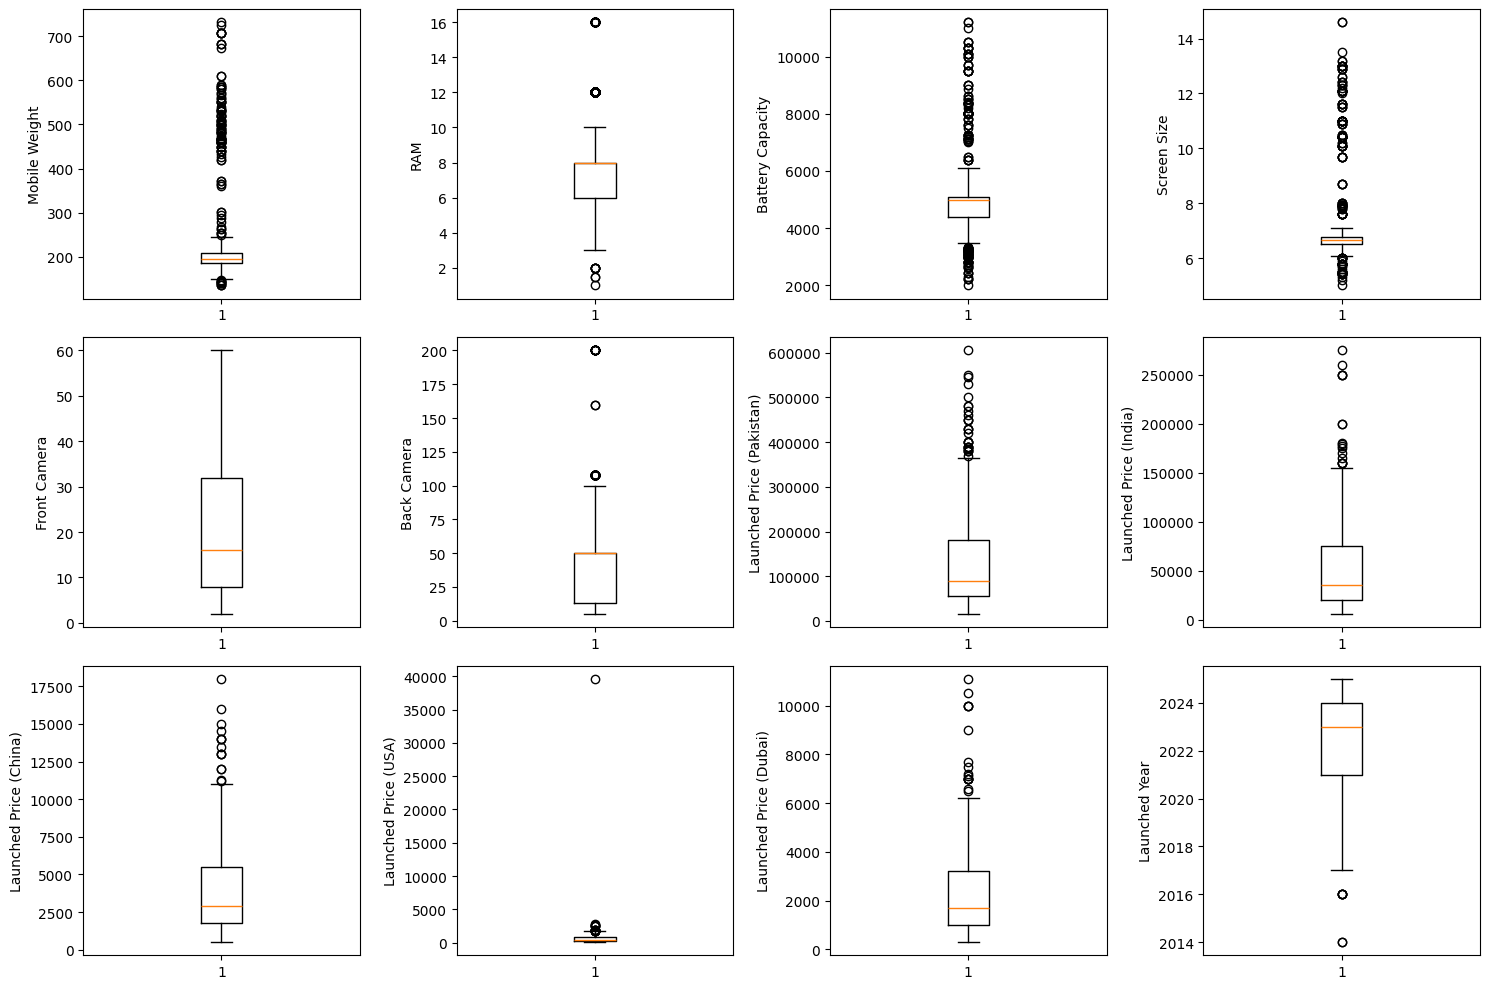

In [20]:
# Box plot for numeric columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[col])
    plt.ylabel(col)
plt.tight_layout()
plt.show()

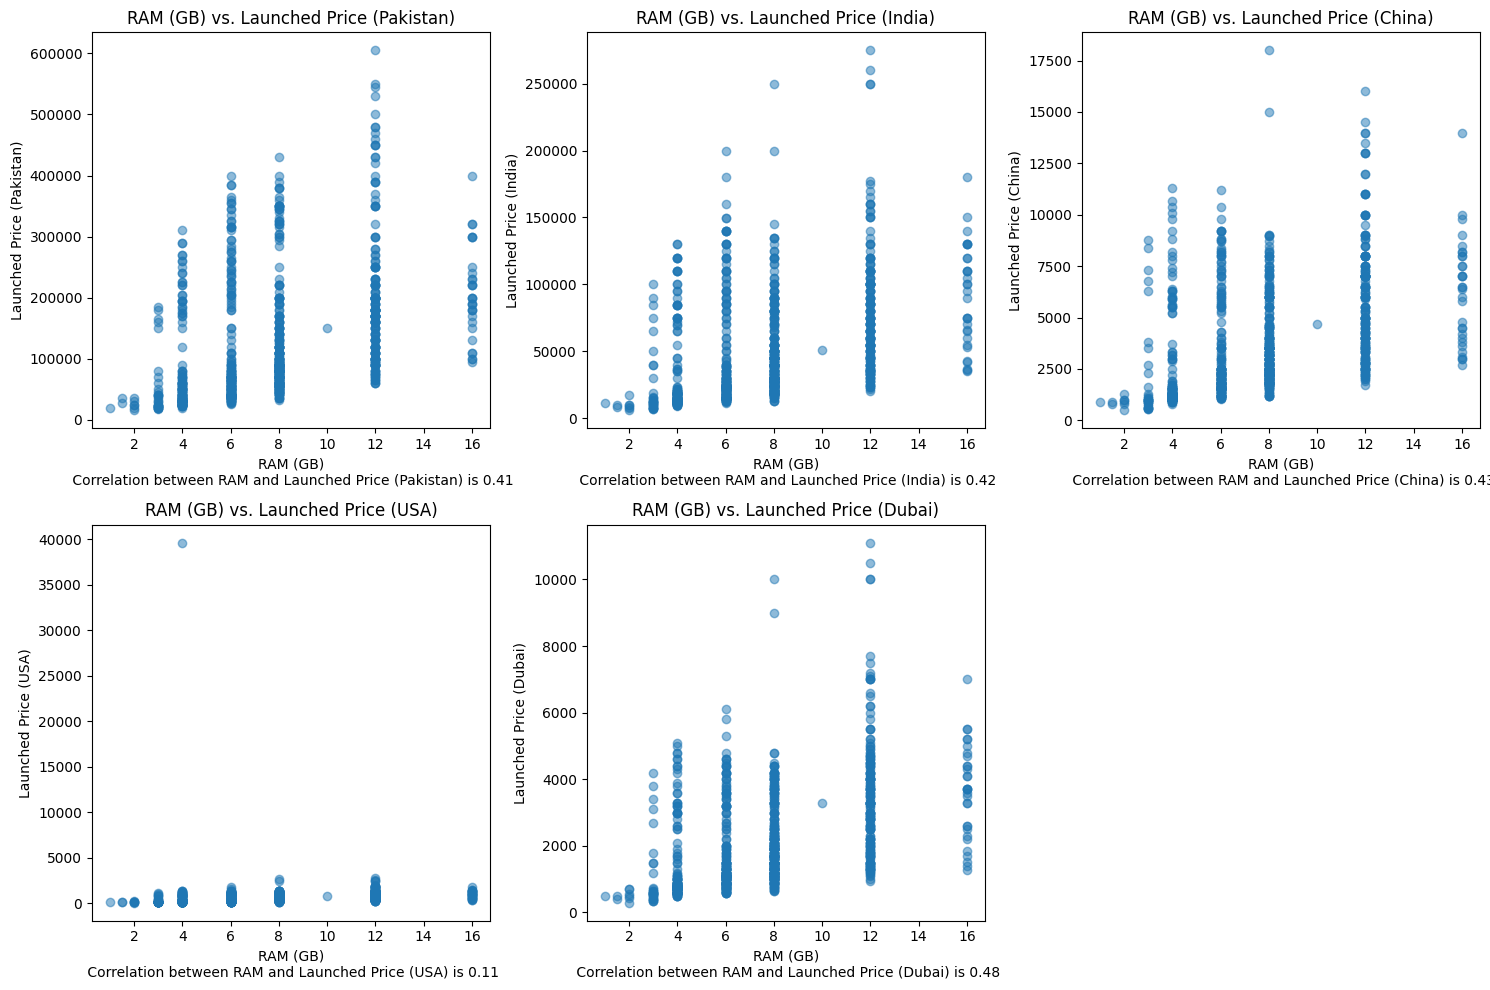

In [21]:
# Correlation between prices in different countries and RAM size
plt.figure(figsize=(15, 10))
for i, col in enumerate(country_price_col):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df['RAM'], df[col], alpha=0.5)
    plt.xlabel(f'RAM (GB)\n Correlation between RAM and {col} is {df['RAM'].corr(df[col]):.2f}')
    plt.ylabel(f'{col}')
    plt.title(f'RAM (GB) vs. {col}')
plt.tight_layout()
plt.show()

The Correlation between them is: 0.848


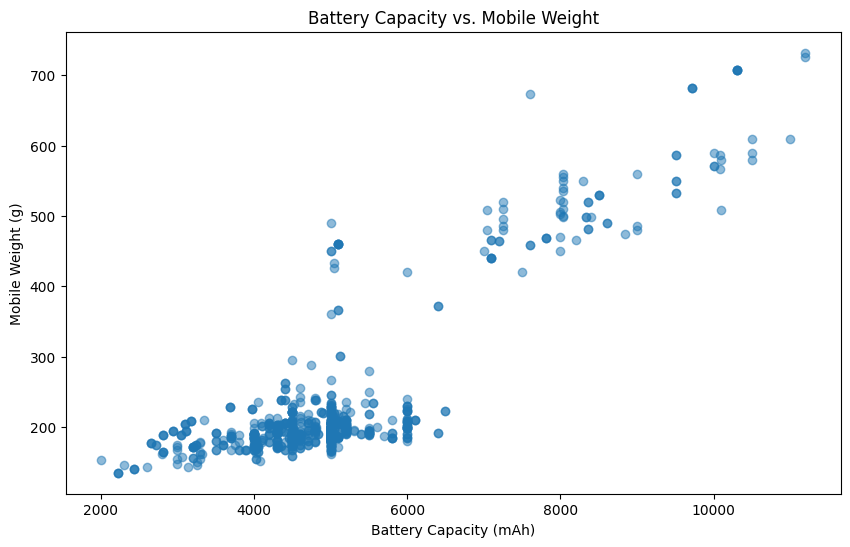

In [22]:
# Correlation between Battery Capacity and Mobile Weight
plt.figure(figsize=(10, 6))
plt.scatter(df['Battery Capacity'], df['Mobile Weight'], alpha=0.5)
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Mobile Weight (g)')
plt.title('Battery Capacity vs. Mobile Weight')
print(f'The Correlation between them is: {df['Battery Capacity'].corr(df['Mobile Weight']):.3f}')
plt.show()

In [23]:
#Average ram size of phone is
print(f'The average RAM size is: {df['RAM'].mean()}')

The average RAM size is: 7.784463894967177


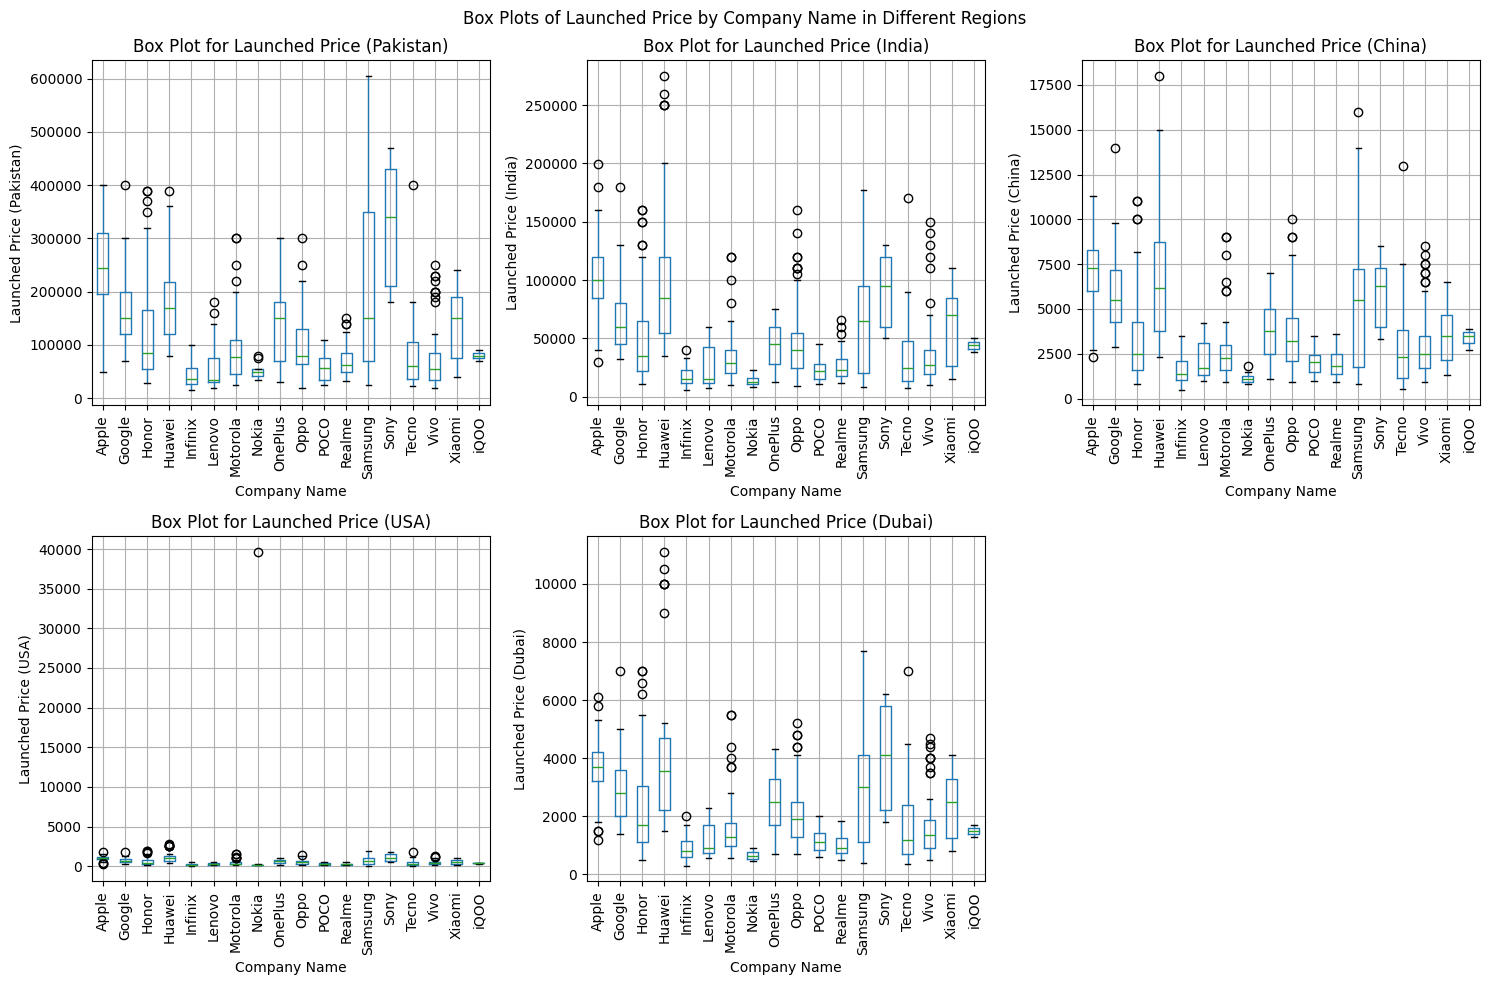

In [24]:
#Creating Box plots to determing the brands with highest and the lowest price in different regions

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(country_price_col):
    df.boxplot(column=col, by='Company Name', ax=axes[i])
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('Company Name')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Box Plot for {col}')
fig.suptitle('Box Plots of Launched Price by Company Name in Different Regions')
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

# Price Trend Analysis and Visualization

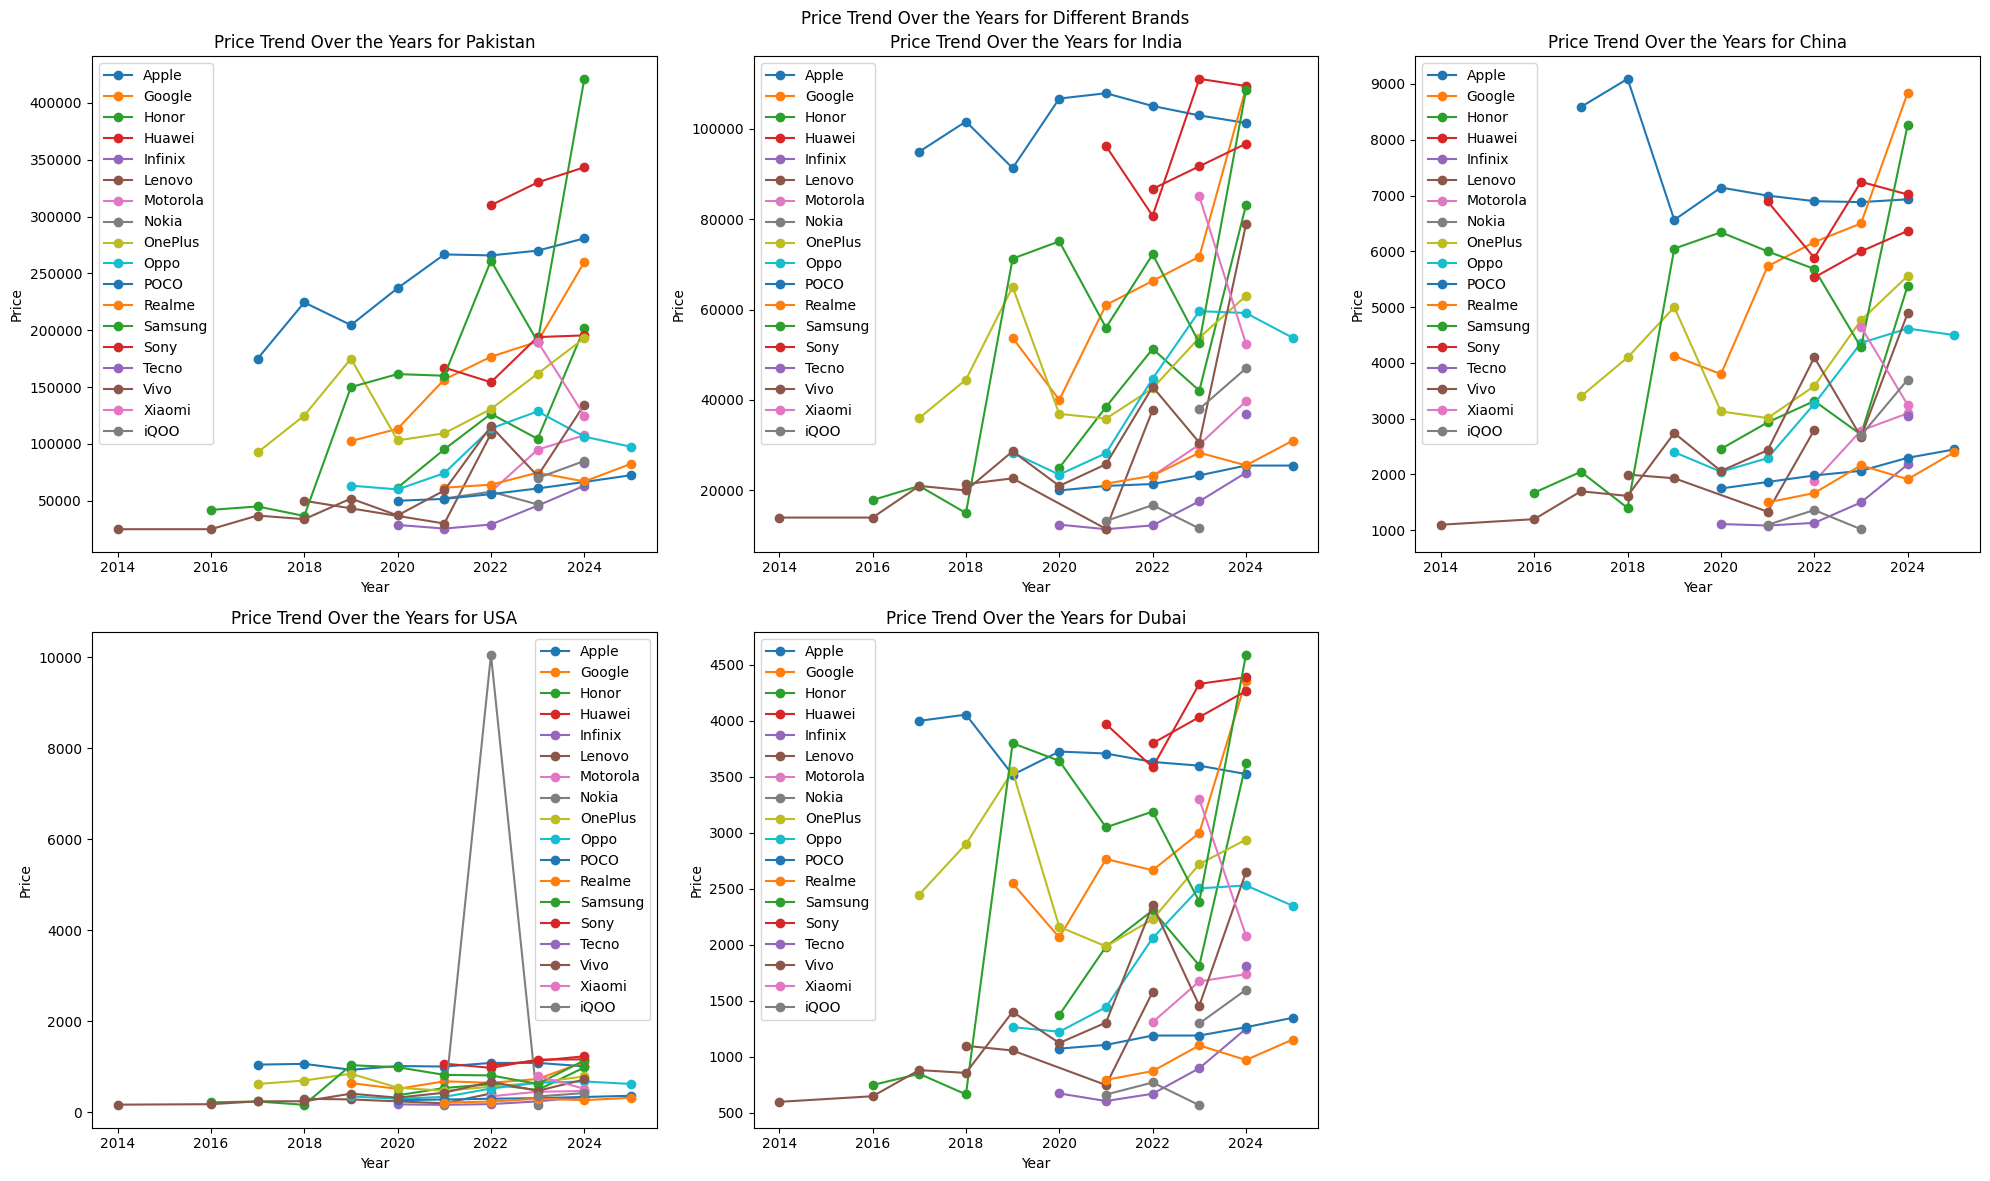

In [25]:
#Price Trend over the years for different brands
fig, axes = plt.subplots(2, 3, figsize=(20,12))
axes = axes.flatten()

grouped_df = df.groupby(['Company Name','Launched Year'])[country_price_col].mean().reset_index()

for i,cols in enumerate(country_price_col):
  ax = axes[i]
  # Iterating over each company in the region for their price over the year
  for company in grouped_df['Company Name'].unique():
    company_data = grouped_df[grouped_df['Company Name'] == company]
    ax.plot(company_data['Launched Year'], company_data[cols], marker='o', label=company)
  ax.set_title(f'Price Trend Over the Years for {cols.replace('Launched Price','').replace('(','').replace(')','').strip()}')
  ax.set_xlabel('Year')
  ax.set_ylabel('Price')
  ax.legend()
fig.delaxes(axes[5])
plt.suptitle('Price Trend Over the Years for Different Brands')
plt.tight_layout()
plt.show()

                       index  Average Price
0  Launched Price (Pakistan)  126559.210066
1     Launched Price (India)   50906.425602
2     Launched Price (China)    3838.562363
3       Launched Price (USA)     629.918665
4     Launched Price (Dubai)    2192.626915


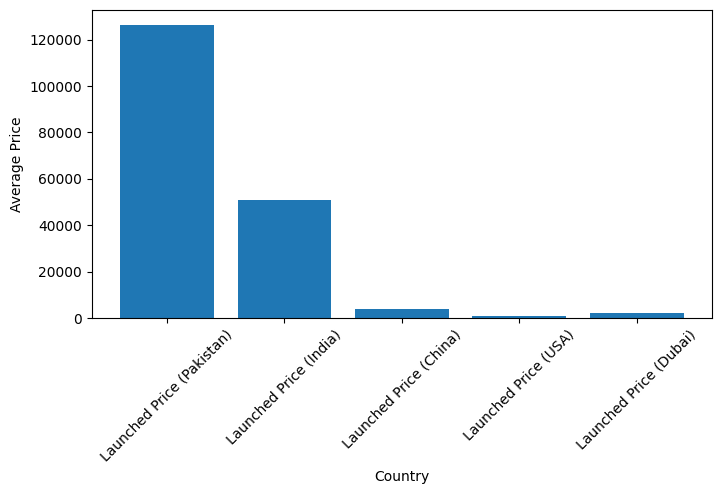

In [26]:
# Finding the highest average cost for smartphones

average_cost_df=df[country_price_col].mean().reset_index().rename(columns={0: 'Average Price'})
plt.figure(figsize=(8, 4))
plt.bar(average_cost_df['index'], average_cost_df['Average Price'])
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
print(average_cost_df)
plt.show()

# Hardware Comparison and Market Competitiveness

<Figure size 1500x1000 with 0 Axes>

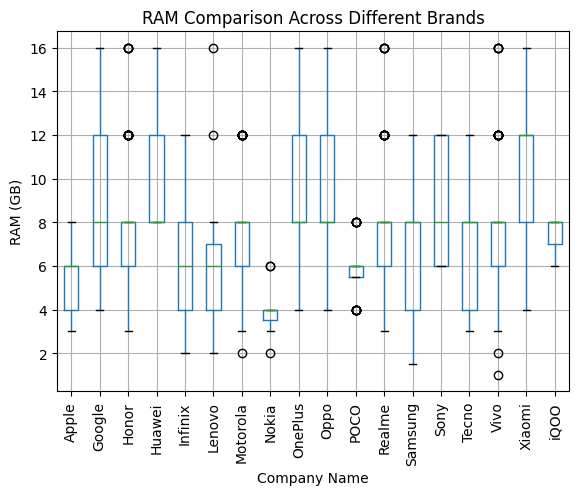

In [27]:
#Comparing RAM across different brand through box Plots
plt.figure(figsize=(15, 10))
df.boxplot(column='RAM', by='Company Name')
plt.xlabel('Company Name')
plt.ylabel('RAM (GB)')
plt.title('RAM Comparison Across Different Brands')
plt.xticks(rotation=90)
plt.suptitle('')
plt.show()

Company Name  RAM 
Apple         3.0      9
              4.0     31
              6.0     45
              8.0     12
Google        4.0      2
                      ..
Xiaomi        8.0      4
              12.0    13
              16.0     4
iQOO          6.0      1
              8.0      2
Name: count, Length: 91, dtype: int64


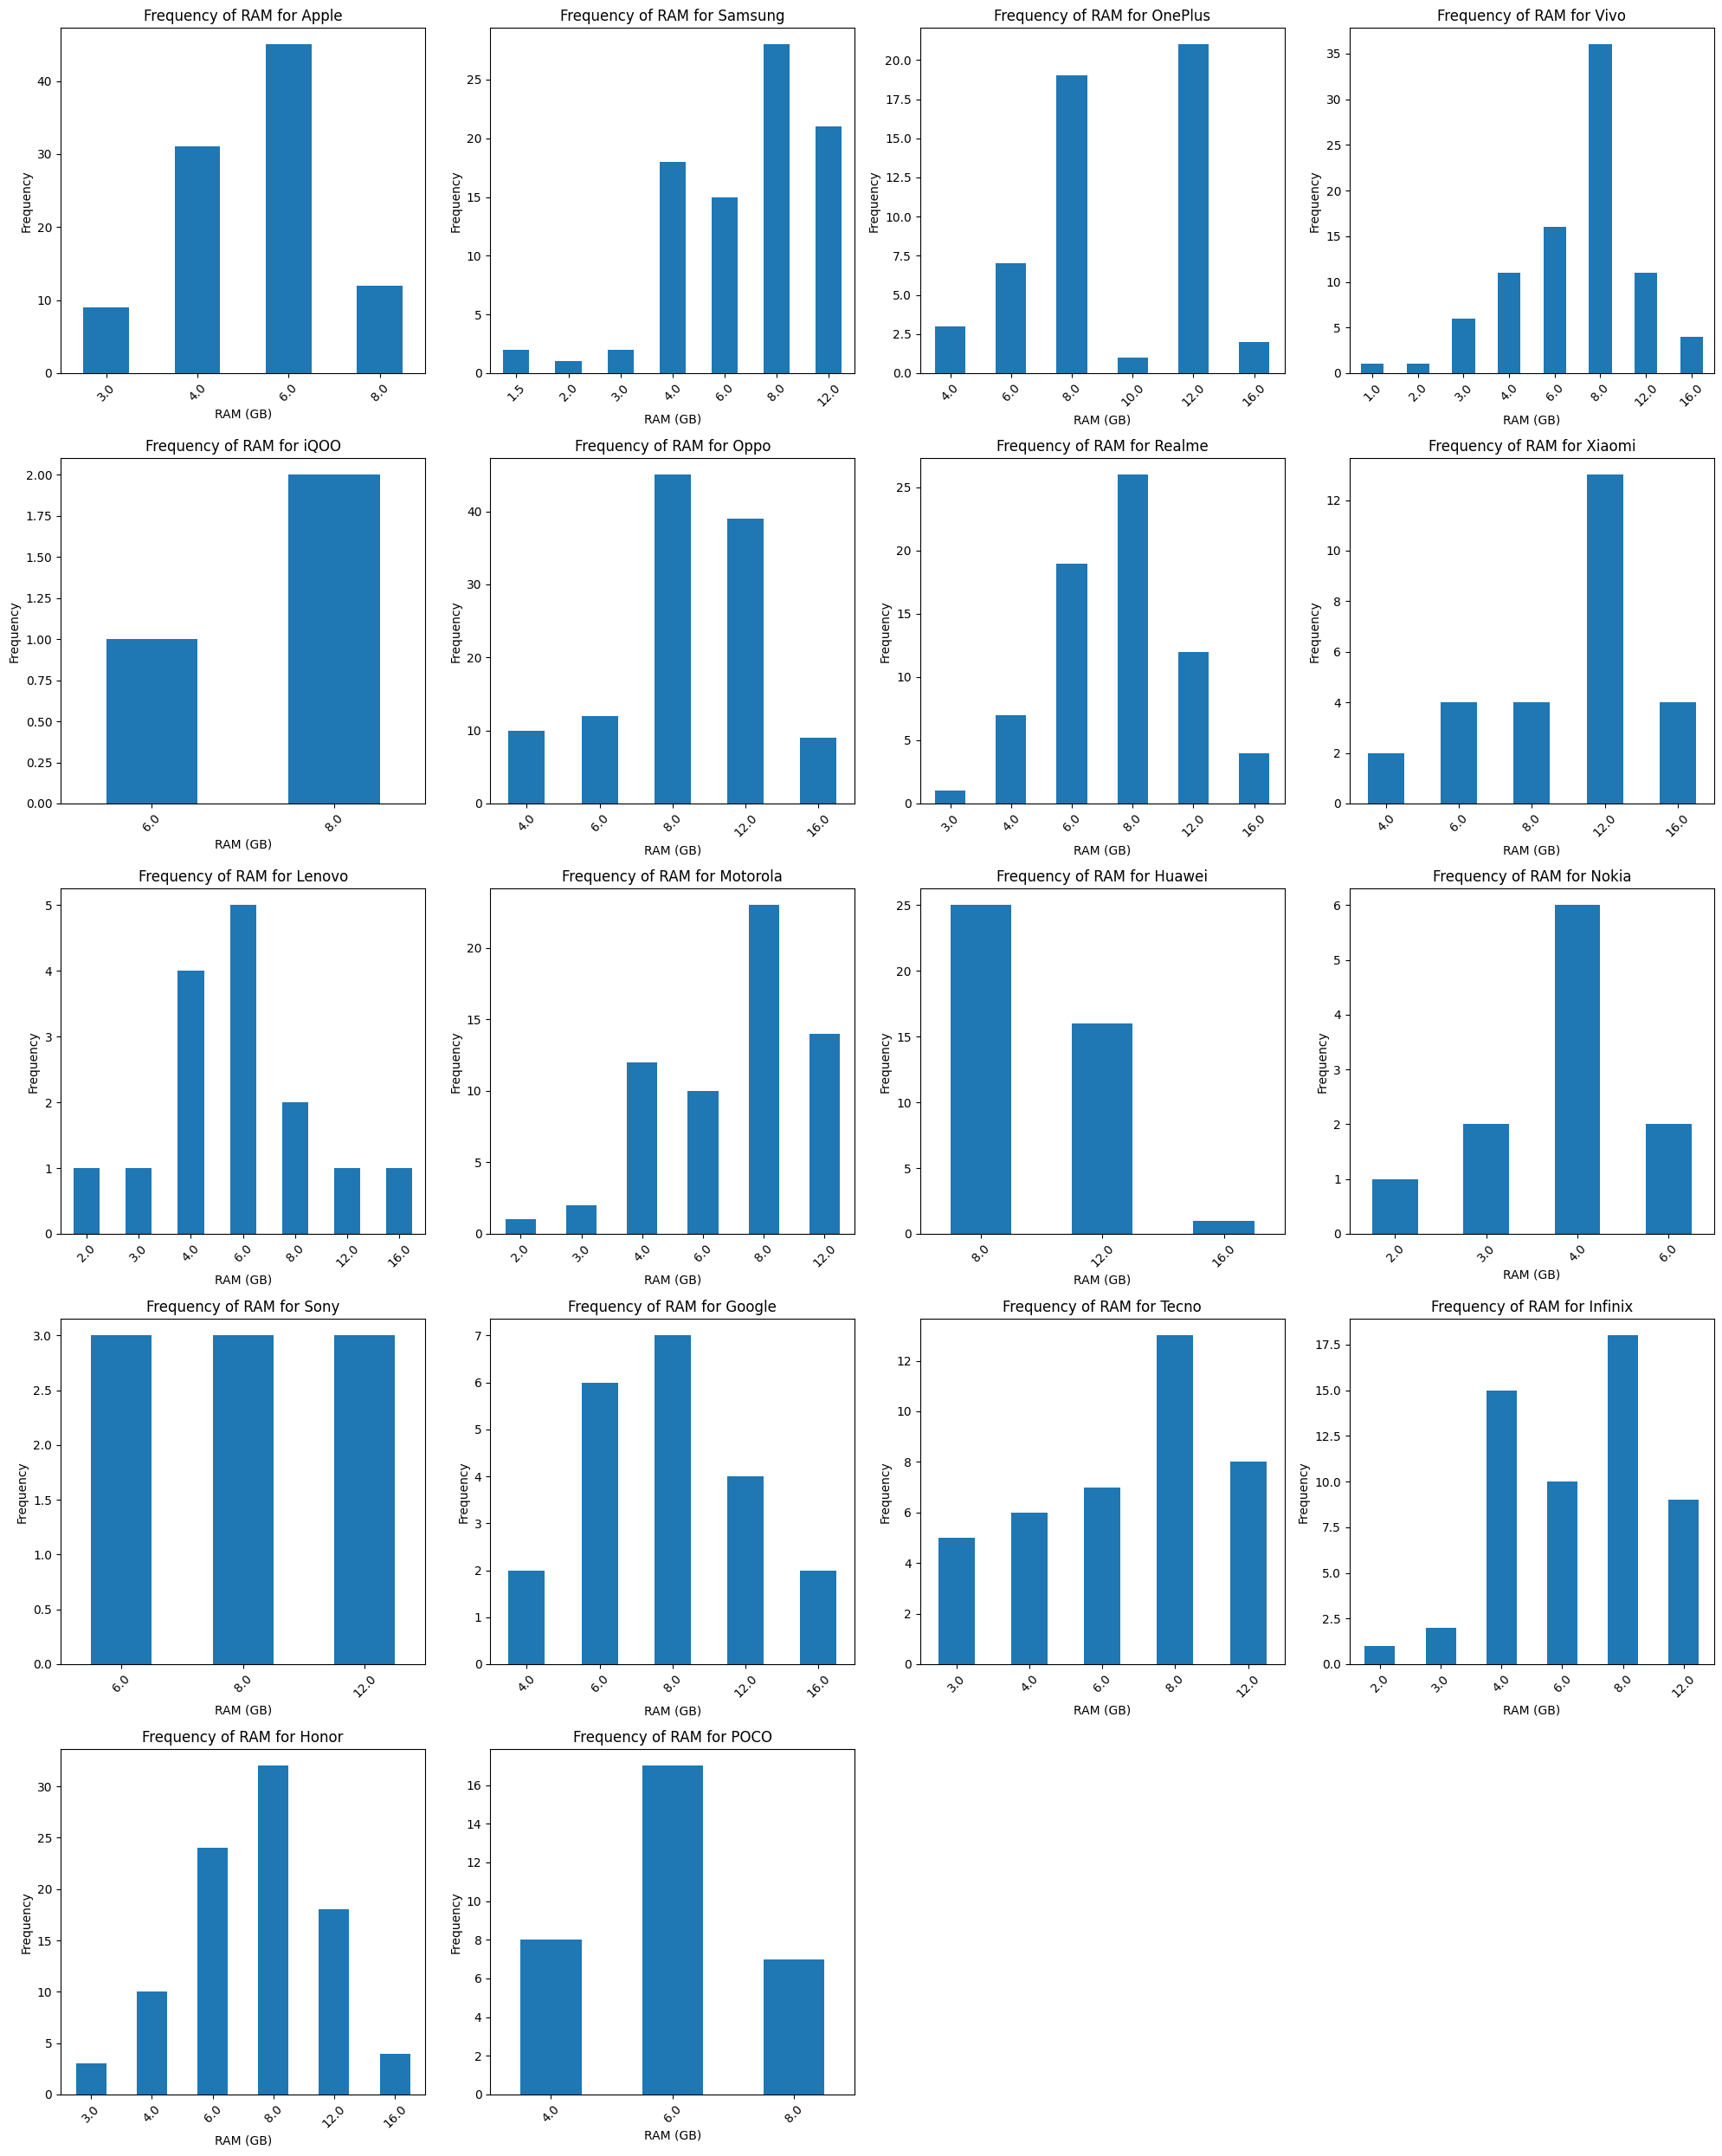

In [28]:
# frequency of RAM used by each company
ram_counts = df.groupby('Company Name')['RAM'].value_counts().sort_index()
print(ram_counts)

fig, axes = plt.subplots(5, 4, figsize=(20,25))
axes = axes.flatten()

for i, company in enumerate(df['Company Name'].unique()):
  ax = axes[i]
  company_ram_counts = df[df['Company Name'] == company]['RAM'].value_counts().sort_index()
  company_ram_counts.plot(kind='bar', ax=ax)
  ax.set_title(f'Frequency of RAM for {company}')
  ax.set_xlabel('RAM (GB)')
  ax.set_ylabel('Frequency')
  ax.tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

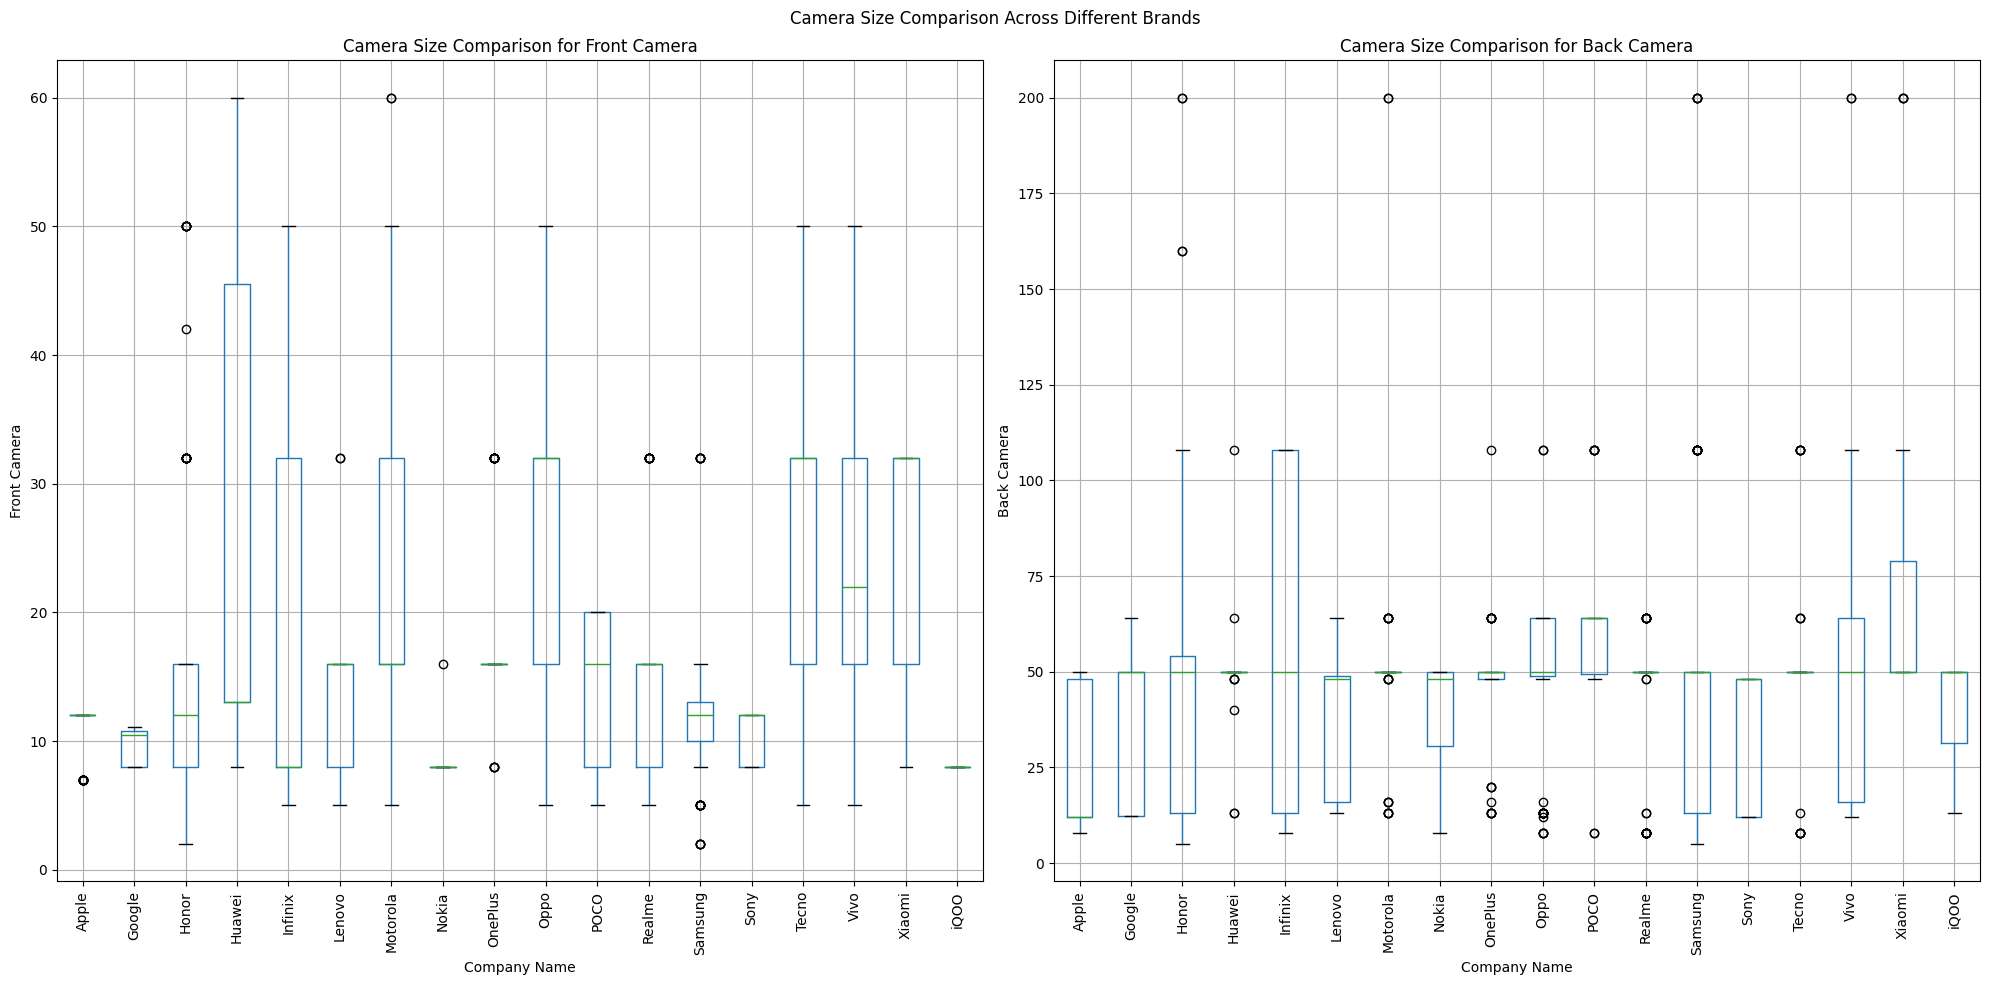

In [29]:
# Comparing Camera Size over Different Brands
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes = axes.flatten()

camera_cols = ['Front Camera', 'Back Camera']

for i, col in enumerate(camera_cols):
  ax = axes[i]
  df.boxplot(column=col, by='Company Name', ax=ax)
  ax.set_title(f'Camera Size Comparison for {col}')
  ax.set_xlabel('Company Name')
  ax.set_ylabel(col)
  ax.tick_params(axis='x', rotation=90)

plt.suptitle('Camera Size Comparison Across Different Brands')
plt.tight_layout()
plt.show()

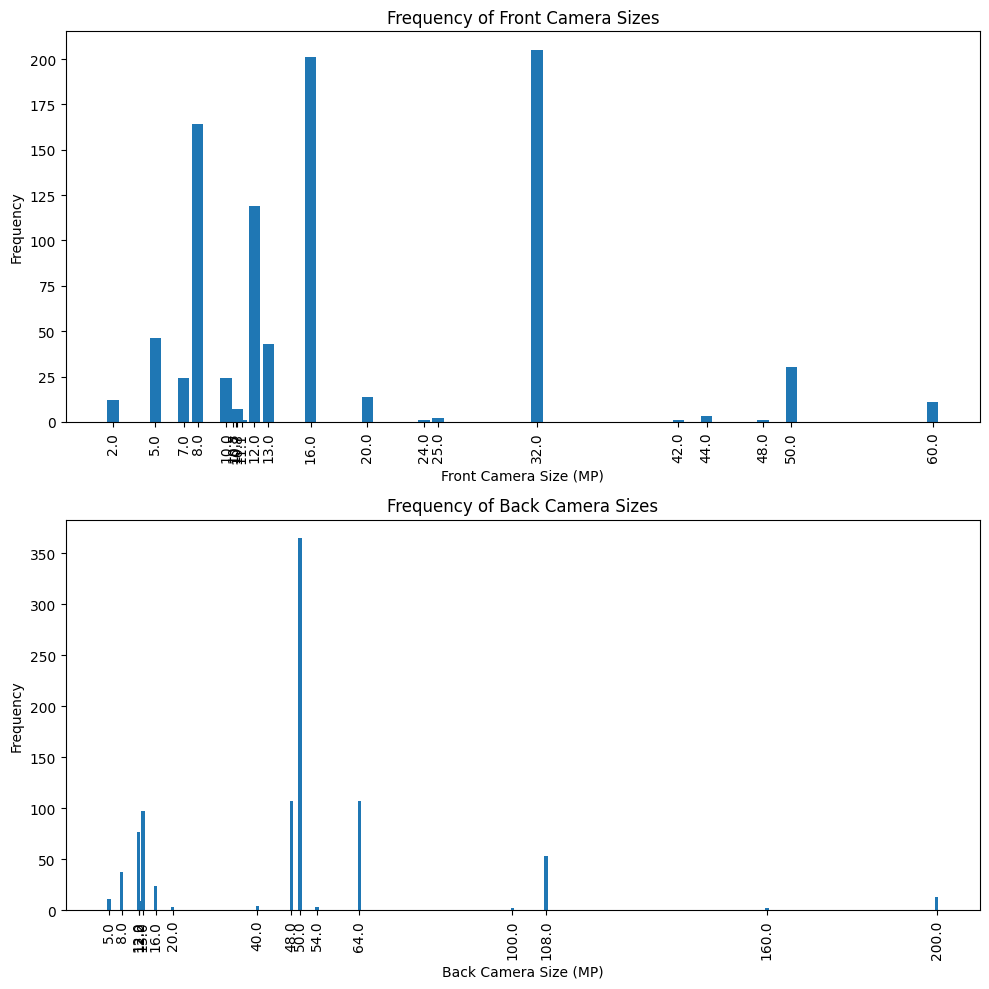

In [30]:
# Frequency of Camera Sizes used

# Get the value counts for Front Camera and Back Camera
front_camera_counts = df['Front Camera'].value_counts().sort_index()
back_camera_counts = df['Back Camera'].value_counts().sort_index()

# Create bar plots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.flatten()

# Bar plot for Front Camera frequency
axes[0].bar(front_camera_counts.index, front_camera_counts.values)
axes[0].set_xlabel('Front Camera Size (MP)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of Front Camera Sizes')
axes[0].set_xticks(front_camera_counts.index)
axes[0].tick_params(axis='x', rotation=90)

# Bar plot for Back Camera frequency
axes[1].bar(back_camera_counts.index, back_camera_counts.values)
axes[1].set_xlabel('Back Camera Size (MP)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of Back Camera Sizes')
axes[1].set_xticks(back_camera_counts.index)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

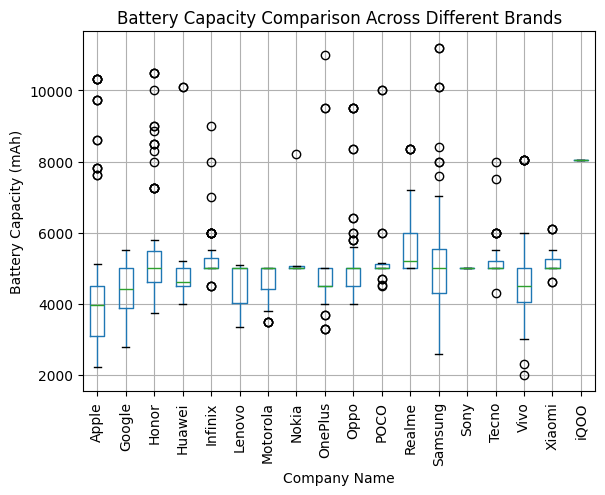

In [31]:
# Comparing Battery Capacity for different brands
plt.figure(figsize=(15, 10))
df.boxplot(column='Battery Capacity', by='Company Name')
plt.xlabel('Company Name')
plt.ylabel('Battery Capacity (mAh)')
plt.title('Battery Capacity Comparison Across Different Brands')
plt.xticks(rotation=90)
plt.suptitle('')
plt.show()

   Company Name  Battery Capacity
0          iQOO       8040.000000
1        Realme       5691.304348
2         Honor       5488.461538
3          POCO       5351.093750
4       Infinix       5336.363636
5         Tecno       5315.384615
6         Nokia       5309.090909
7        Xiaomi       5172.222222
8       Samsung       5127.701149
9          Oppo       5004.782609
10         Sony       5000.000000
11       Huawei       4900.000000
12      OnePlus       4840.377358
13     Motorola       4688.709677
14         Vivo       4678.604651
15       Lenovo       4520.000000
16        Apple       4442.577320
17       Google       4341.047619


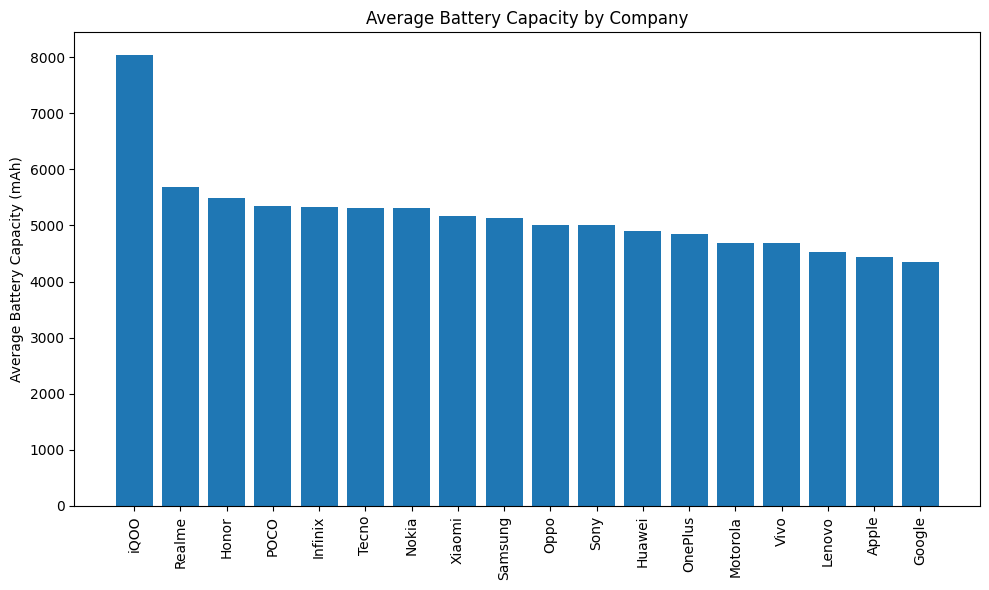

In [32]:
# Average battery capacity across Smartphones brands

plt.figure(figsize=(10,6))
battery_capacity_df = df.groupby('Company Name')['Battery Capacity'].mean().sort_values(ascending=False).reset_index()
print(battery_capacity_df)
plt.bar(battery_capacity_df['Company Name'], battery_capacity_df['Battery Capacity'])
plt.xticks(rotation=90)
plt.ylabel('Average Battery Capacity (mAh)')
plt.title('Average Battery Capacity by Company')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

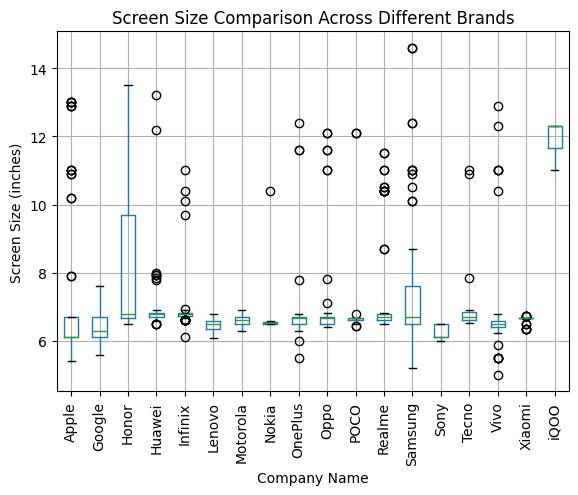

In [33]:
# comapring screen size across each brand using box plots

plt.figure(figsize=(15, 10))
df.boxplot(column='Screen Size', by='Company Name')
plt.xlabel('Company Name')
plt.ylabel('Screen Size (inches)')
plt.title('Screen Size Comparison Across Different Brands')
plt.xticks(rotation=90)
plt.suptitle('')
plt.show()

Screen Size vs Launched Price (Pakistan)    0.060742
Screen Size vs Launched Price (India)       0.104396
Screen Size vs Launched Price (China)       0.103497
Screen Size vs Launched Price (USA)         0.094038
Screen Size vs Launched Price (Dubai)       0.076304
dtype: float64


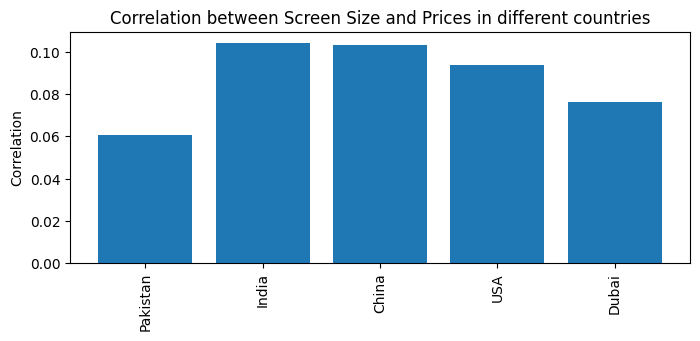

Average Correlation over all regions is:  0.08779537767873942


In [34]:
# Corelation between Screen Size and smartphone Prices
correlation_list = []
for col in country_price_col:
 correlation = df['Screen Size'].corr(df[col])
 correlation_list.append(float(correlation))
correlation_series = pd.Series(correlation_list, index=[f'Screen Size vs {col}' for col in country_price_col])
print(correlation_series)

plt.figure(figsize=(8,3))
plt.bar(correlation_series.index, correlation_series.values)
plt.ylabel('Correlation')
cleaned_labels = [label.replace('Screen Size vs Launched Price (','').replace(')','').strip() for label in correlation_series.index]
plt.xticks(correlation_series.index, cleaned_labels, rotation=90)
plt.title('Correlation between Screen Size and Prices in different countries')
plt.show()
print('Average Correlation over all regions is: ', correlation_series.mean())

In [35]:
# exporting to a excel file to be used in tableau for dynamic dashboard
df.to_excel('mobilephonedata.xlsx')
print('Link to Tableau Dashboard: https://public.tableau.com/views/MobilePhonetrendVisualization/Dashboard2?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link')

Link to Tableau Dashboard: https://public.tableau.com/views/MobilePhonetrendVisualization/Dashboard2?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
